# <font color='violet'> Deeper EDA on Review Text

On data that was cleaned and lemmatized here: https://github.com/fractaldatalearning/psychedelic_efficacy/blob/main/notebooks/4-kl-studies-nlp.ipynb

In [1]:
# ! pip install nltk
# nltk.download('punkt')
# ! pip install textblob

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter
from tqdm import tqdm
from textblob import TextBlob

In [3]:
df = pd.read_csv('../data/interim/studies_lemmatized.csv').drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31559 entries, 0 to 31558
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rating         31559 non-null  float64
 1   condition      31559 non-null  object 
 2   review         31559 non-null  object 
 3   date           31451 non-null  object 
 4   drug0          31559 non-null  object 
 5   drug1          18992 non-null  object 
 6   drug2          32 non-null     object 
 7   drug3          23 non-null     object 
 8   drug4          12 non-null     object 
 9   drug5          11 non-null     object 
 10  drug6          7 non-null      object 
 11  drug7          5 non-null      object 
 12  drug8          3 non-null      object 
 13  drug9          2 non-null      object 
 14  drug10         2 non-null      object 
 15  drug11         2 non-null      object 
 16  drug12         2 non-null      object 
 17  drug13         2 non-null      object 
 18  drug14

<font color='violet'> How do the lengths compare for the review strings with just punctuation removed vs. the lemmatized strings?

In [4]:
review_lengths = [len(df.loc[row,'review']) for row in range(len(df))]
review_mean_length = np.mean(review_lengths)
review_mean_length

457.6392471244336

In [5]:
lemm_lengths = [len(df.loc[row,'no_stops_lemm']) for row in range(len(df))]
lemm_mean_lengths = np.mean(lemm_lengths)
lemm_mean_lengths

256.8190690452803

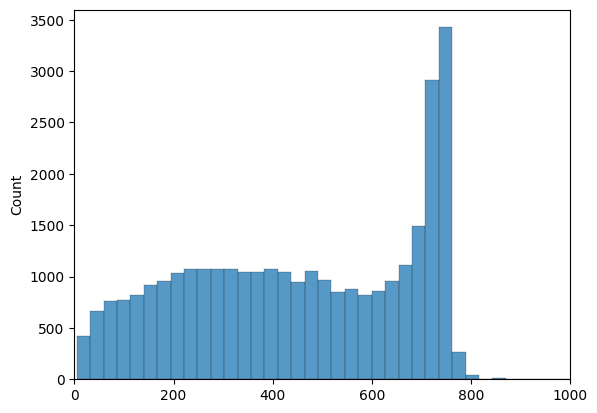

In [6]:
# Plot the distribution of review lengths
sns.histplot(review_lengths).set(xlim=(0,1000))
plt.show()

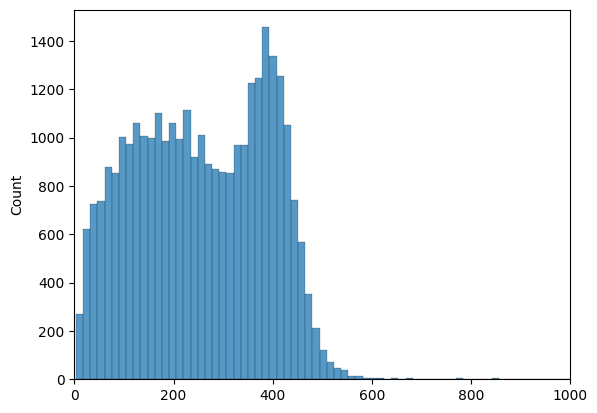

In [7]:
# Did lemmatizing and removing stopwords do anything to normalize the distribution of lengths?
sns.histplot(lemm_lengths).set(xlim=(0,1000))
plt.show()

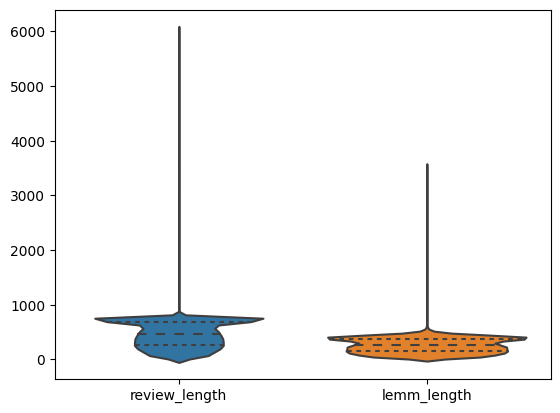

In [8]:
# The second peak looks a bit less extreme. Compare distributions of lengths side by side. 
review_lemm_lengths_df = pd.DataFrame(list(zip(review_lengths, lemm_lengths)),
                                      columns =['review_length', 'lemm_length'])
sns.violinplot(review_lemm_lengths_df, inner='quartile')
plt.show()

They both have quite a few outliers among longer reviews. The lemmatized lenghts' distribution mostly seems like a squished version of the reviews' lengths, but with a shape somewhat approaching something more normal. 

<font color='violet'> Beyond distribution, is there an association between a review length and rating?

In [9]:
df['review_len'] = [len(df.loc[row,'review']) for row in range(len(df))]
df.head()

,rating,condition,review,date,drug0,drug1,drug2,drug3,drug4,drug5,...,drug8,drug9,drug10,drug11,drug12,drug13,drug14,drug15,no_stops_lemm,review_len
0,9.0,add,I had began taking 20mg of Vyvanse for three m...,NaN,vyvanse,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,begin take 20 mg Vyvanse month surprised find ...,781
1,8.0,add,Switched from Adderall to Dexedrine to compare...,NaN,dextroamphetamine,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,switch Adderall Dexedrine compare effect Dexed...,783
2,8.0,adhd,I have only been on Vyvanse for 2 weeks I sta...,NaN,vyvanse,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vyvanse 2 week start 40 mg 60 mg week probab...,435
3,8.0,fatigue,1 subcutaneous injection of somatropin in abdo...,NaN,saizen,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 subcutaneous injection somatropin abdoman in...,498
4,3.0,dementia,Since many of these ss are also ss of the dise...,NaN,zyprexa,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,many ss ss diseaseLewy body Syndrome Demenia t...,405


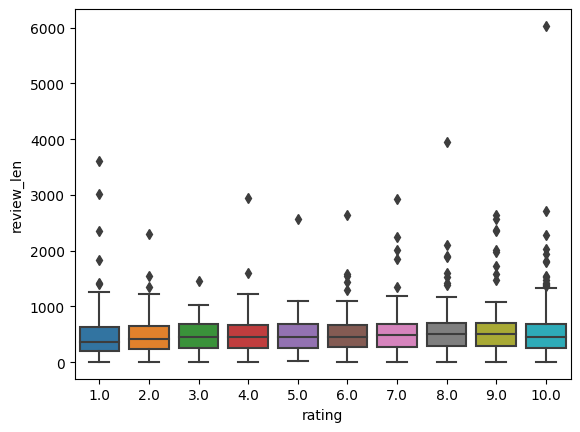

In [10]:
# Visualize the rating:review_len relationship
sns.boxplot(data=df, x='rating', y='review_len')
plt.show()

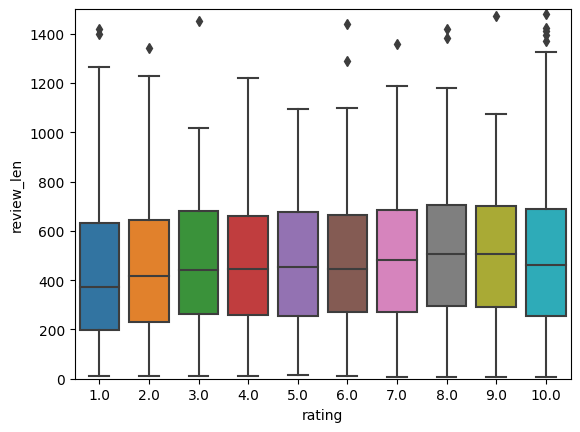

In [11]:
# Zoom in the boxes for less emphasis on the outliers
sns.boxplot(data=df, x='rating', y='review_len').set(ylim=(0,1500))
plt.show()

Even zoomed in, there doesn't seem to be a super clear-cut correlation between rating and review_length. Extreme ratings tend to be a tiny bit shorter. 

<font color='violet'> Do average word lengths vary significantly across reviews? 

In [12]:
# Add column for averge word length from the review column (not average lemma length)
for row in tqdm(range(len(df))):
    str_to_work_w = df.loc[row,'review']
    df.loc[row,'mean_wrd_len'] = np.mean([len(w) for w in str_to_work_w.split()])
df.head()

100%|██████████| 31559/31559 [00:08<00:00, 3567.59it/s]


,rating,condition,review,date,drug0,drug1,drug2,drug3,drug4,drug5,...,drug9,drug10,drug11,drug12,drug13,drug14,drug15,no_stops_lemm,review_len,mean_wrd_len
0,9.0,add,I had began taking 20mg of Vyvanse for three m...,NaN,vyvanse,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,begin take 20 mg Vyvanse month surprised find ...,781,4.321918
1,8.0,add,Switched from Adderall to Dexedrine to compare...,NaN,dextroamphetamine,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,switch Adderall Dexedrine compare effect Dexed...,783,5.479339
2,8.0,adhd,I have only been on Vyvanse for 2 weeks I sta...,NaN,vyvanse,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vyvanse 2 week start 40 mg 60 mg week probab...,435,3.909091
3,8.0,fatigue,1 subcutaneous injection of somatropin in abdo...,NaN,saizen,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 subcutaneous injection somatropin abdoman in...,498,5.012048
4,3.0,dementia,Since many of these ss are also ss of the dise...,NaN,zyprexa,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,many ss ss diseaseLewy body Syndrome Demenia t...,405,4.611111


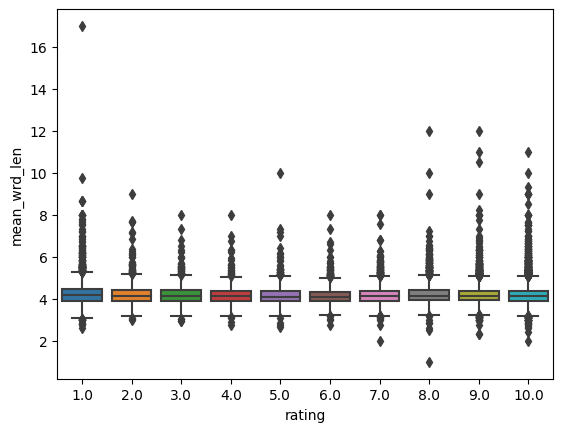

In [13]:
# Visualize rating: word_length relationship
sns.boxplot(data=df, x='rating', y='mean_wrd_len')
plt.show()

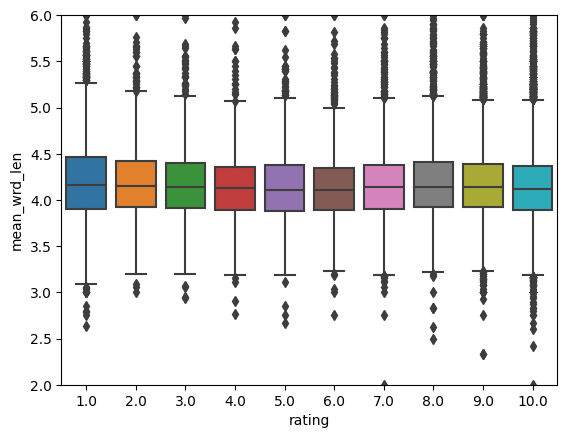

In [14]:
# Zoom in 
sns.boxplot(data=df, x='rating', y='mean_wrd_len').set(ylim=(2,6))
plt.show()

Like with overall word count of each review, average word length within each review seems not to have a huge correlation with ratings. 

Beyond total length or average word length, there are more sophisticated ways of quantitatively comparing reviews, such as text complexity. There are many text complexity measures; for me, the simplest to interpret are those that return a "grade level" equivalent. I'll go with flesch_kincaid_grade. Since I removed punctuation, and complexity rating considers sentence length, I'll need to go back to an older dataset from before I did that. If I find that review complexity varies widely and correlates with ratings, I can go back to do that in an earlier notebook and re-save the data so complexity scores are maintained even after removing punctuation. 

<font color='violet'> Does review complexity correlate with rating?  

In [15]:
old_data_with_punc = pd.read_csv('../data/interim/studies_initial_cleaning.csv')
old_data_with_punc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50637 entries, 0 to 50636
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50637 non-null  int64  
 1   drug        50637 non-null  object 
 2   rating      50637 non-null  float64
 3   condition   50637 non-null  object 
 4   review      50637 non-null  object 
 5   date        50637 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.3+ MB


In [18]:
# Add row for complexity score
old_data_with_punc['complexity'] = old_data_with_punc['review'].apply(
    lambda x : flesch_kincaid_grade(x))
old_data_with_punc.head()

,Unnamed: 0,drug,rating,condition,review,date,complexity
0,0,vyvanse,9.0,add,I had began taking 20mg of Vyvanse for three m...,0,10.4
1,1,dextroamphetamine,8.0,add,Switched from Adderall to Dexedrine to compare...,0,8.0
2,2,vyvanse,8.0,adhd,I have only been on Vyvanse for 2 weeks. I st...,0,2.9
3,3,saizen,8.0,fatigue,1 subcutaneous injection of somatropin in abdo...,0,14.1
4,4,zyprexa,3.0,dementia,Since many of these s/s are also s/s of the di...,0,11.5


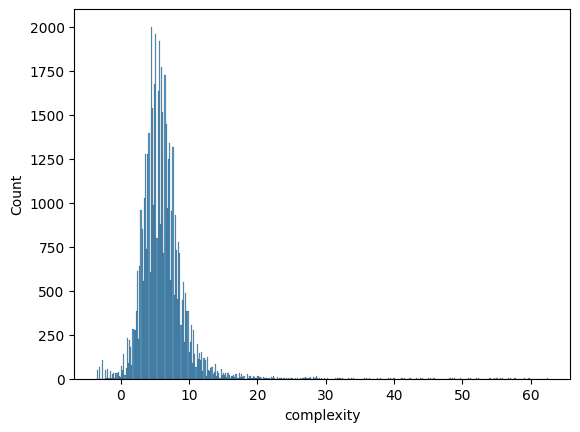

In [19]:
# What is the distribution of complexities?
sns.histplot(old_data_with_punc.complexity)
plt.show()

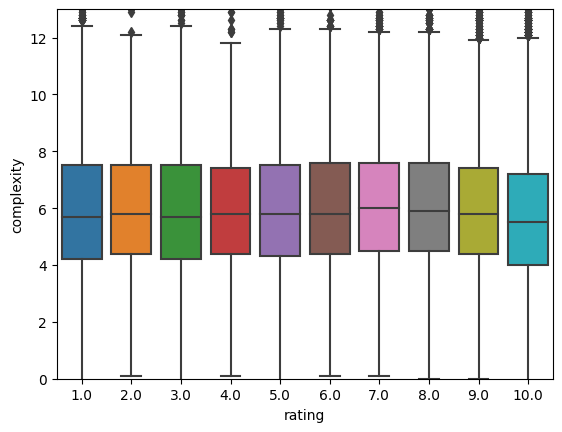

In [24]:
# Text complexity is mostly normally distributed around grade 6, typical for informal writing.
# How are complexities distributed by rating? 
sns.boxplot(data=old_data_with_punc, x='rating', y='complexity').set(ylim=(0,13))
plt.show()

Average complexity of perfect reviews appears to be very slightly lower, but my impression is that text complexity doesn't vary greatly by rating. 

<font color='violet'> What are some of the most common words or n-grams in the dataset? 

Use the lemmatized text for this in order to draw from a smaller, more normalized set of words. 

In [25]:
# Get counter of words and find the most frequent.
word_counter = Counter(word_tokenize(' '.join(df['no_stops_lemm'].tolist())))
most_common_words = dict(word_counter.most_common(20))
most_common_words

{'take': 21021,
 'feel': 20444,
 'mg': 19345,
 'day': 18205,
 'anxiety': 14912,
 'year': 14811,
 '!': 14589,
 'work': 13963,
 'effect': 12723,
 'start': 11908,
 'sleep': 11750,
 'week': 11389,
 'help': 10687,
 'time': 10241,
 'no': 10024,
 'like': 9896,
 'month': 9854,
 'go': 9522,
 'life': 9330,
 'medication': 9223}

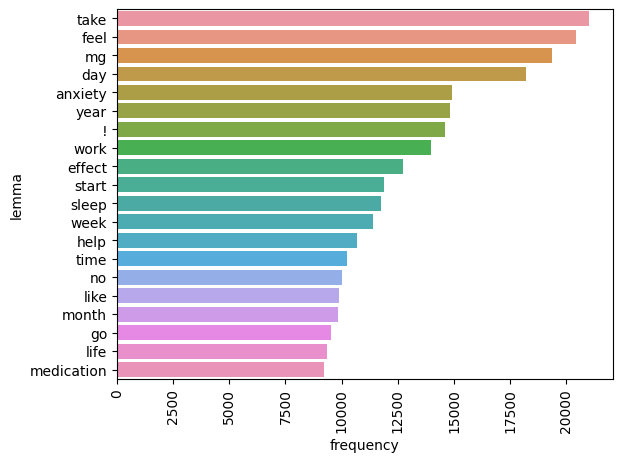

In [26]:
# What is the relative distribution of these strings across lemmatized reviews?
most_common_words_df = pd.DataFrame(data = most_common_words.items(), 
                                     columns=['lemma', 'frequency'])
sns.barplot(data=most_common_words_df, x='frequency', y='lemma')
plt.xticks(rotation=90)
plt.show()

In [27]:
# Get bigrams. This will be easiest if I first remove excessive spaces between lemmas.
for row in tqdm(range(len(df))):
    string_to_strip = df.loc[row, 'no_stops_lemm']
    stripped = " ".join(string_to_strip.split())
    df.loc[row,'no_stops_lemm'] = stripped
    
# Check to see if this worked
len(df[df.no_stops_lemm.str.find('  ')!=-1])

100%|██████████| 31559/31559 [00:18<00:00, 1702.30it/s]


0

In [28]:
list_of_strings = df['no_stops_lemm'].tolist()
bigrams = [x for y in list_of_strings for x in zip(y.split(" ")[:-1], y.split(" ")[1:])]
len(bigrams)

1218864

In [29]:
bigrams[0:5]

[('begin', 'take'),
 ('take', '20'),
 ('20', 'mg'),
 ('mg', 'Vyvanse'),
 ('Vyvanse', 'month')]

In [30]:
# Use counter to find most common bigrams. 
bigram_counter = Counter(bigrams)
most_common_bigrams = dict(bigram_counter.most_common(20))
most_common_bigrams

{('feel', 'like'): 3830,
 ('panic', 'attack'): 3235,
 ('!', '!'): 2803,
 ('10', 'mg'): 2287,
 ('start', 'take'): 2106,
 ('20', 'mg'): 1920,
 ('50', 'mg'): 1637,
 ('no', 'effect'): 1600,
 ('weight', 'gain'): 1576,
 ('year', 'ago'): 1484,
 ('fall', 'asleep'): 1364,
 ('2', 'week'): 1301,
 ('mg', 'day'): 1279,
 ('5', 'mg'): 1258,
 ('stop', 'take'): 1185,
 ('much', 'well'): 1180,
 ('25', 'mg'): 1169,
 ('year', 'old'): 1147,
 ('feel', 'well'): 1118,
 ('100', 'mg'): 1088}

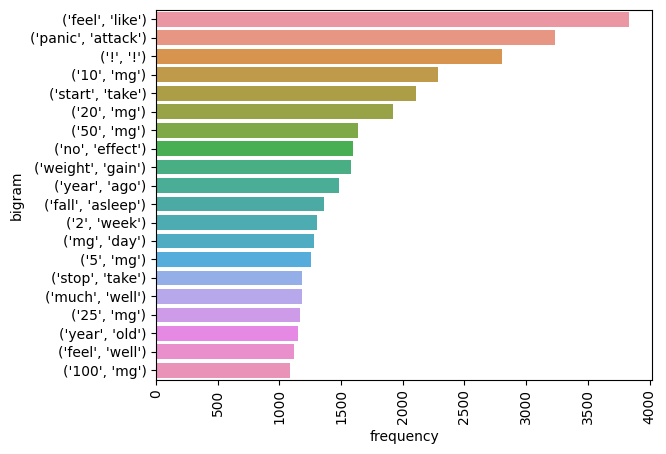

In [31]:
# Visualize bigrams
most_common_bigrams_df = pd.DataFrame(data = most_common_bigrams.items(), 
                                     columns=['bigram', 'frequency'])
sns.barplot(data=most_common_bigrams_df, x='frequency', y='bigram')
plt.xticks(rotation=90)
plt.show()

Some of these are just quantities, but some definitely seem associated with sentiments. See if trigrams seem to be a worthwile thing to build into eventual feature engineering 

In [32]:
trigrams = []

for row in tqdm(range(len(df))):
    string_to_work_w = df.loc[row, 'no_stops_lemm']
    words_list = string_to_work_w.split(" ")
    these_trigrams = []
    for i in range(0 , len(words_list) - 2):
        trigram = words_list[i] + " " + words_list[i+1] + " " + words_list[i + 2]
        these_trigrams.append(trigram)
    trigrams += these_trigrams

len(trigrams)

100%|██████████| 31559/31559 [00:01<00:00, 23817.81it/s]


1187419

In [33]:
trigrams[:5]

['begin take 20',
 'take 20 mg',
 '20 mg Vyvanse',
 'mg Vyvanse month',
 'Vyvanse month surprised']

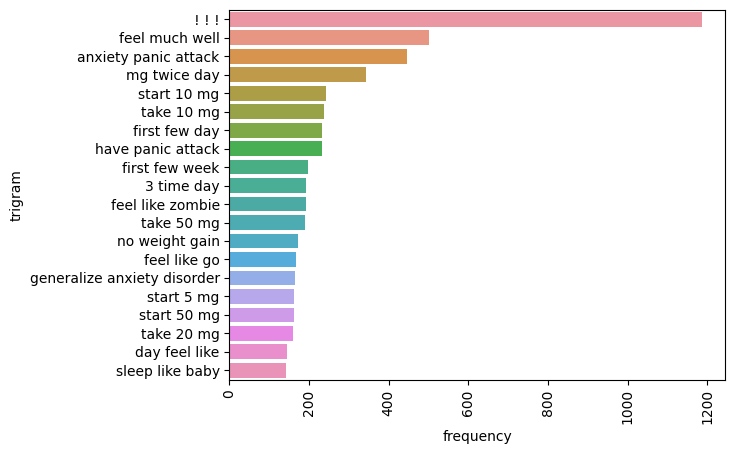

In [34]:
# Get counter for trigrams & Visualize
trigrams_counter = Counter(trigrams)
most_common_trigrams = dict(trigrams_counter.most_common(20))

most_common_trigrams_df = pd.DataFrame(data = most_common_trigrams.items(), 
                                     columns=['trigram', 'frequency'])
sns.barplot(data=most_common_trigrams_df, x='frequency', y='trigram')
plt.xticks(rotation=90)
plt.show()

100%|██████████| 31559/31559 [00:01<00:00, 25938.98it/s]


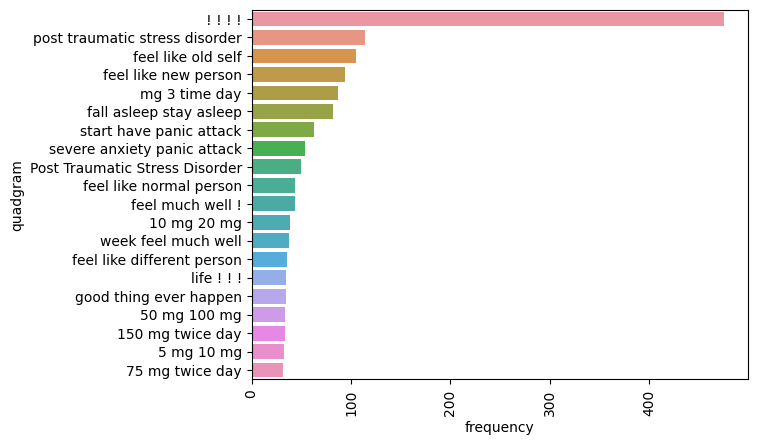

In [35]:
# Fascinating. Repeat for quadgrams
quadgrams = []

for row in tqdm(range(len(df))):
    string_to_work_w = df.loc[row, 'no_stops_lemm']
    words_list = string_to_work_w.split(" ")
    these_quadgrams = []
    for i in range(0 , len(words_list) - 3):
        quadgram = (words_list[i] + " " + words_list[i+1] + " " + words_list[i + 2] + " " + 
                    words_list[i + 3])
        these_quadgrams.append(quadgram)
    quadgrams += these_quadgrams

# Get counter and visualize
quadgrams_counter = Counter(quadgrams)
most_common_quadgrams = dict(quadgrams_counter.most_common(20))

most_common_quadgrams_df = pd.DataFrame(data = most_common_quadgrams.items(), 
                                     columns=['quadgram', 'frequency'])
sns.barplot(data=most_common_quadgrams_df, x='frequency', y='quadgram')
plt.xticks(rotation=90)
plt.show()

100%|██████████| 31559/31559 [00:01<00:00, 19900.24it/s]


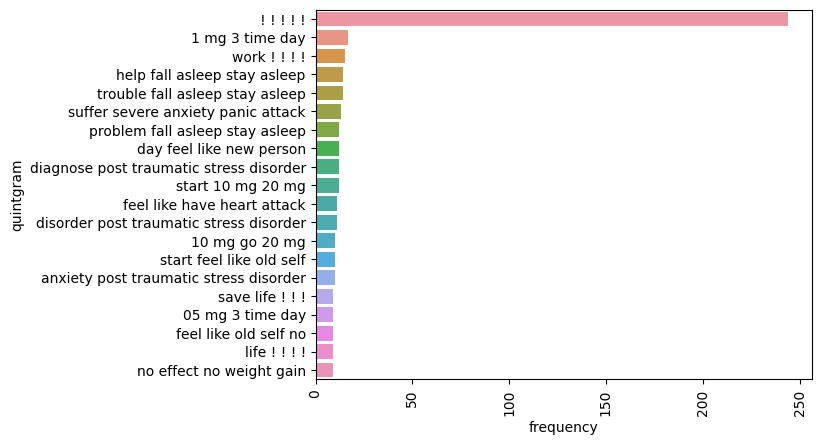

In [36]:
# And quintgrams
quintgrams = []

for row in tqdm(range(len(df))):
    string_to_work_w = df.loc[row, 'no_stops_lemm']
    words_list = string_to_work_w.split(" ")
    these_quintgrams = []
    for i in range(0 , len(words_list) - 4):
        quintgram = (words_list[i] + " " + words_list[i+1] + " " + words_list[i + 2] + " " + 
                     words_list[i + 3] + " " + words_list[i + 4])
        these_quintgrams.append(quintgram)
    quintgrams += these_quintgrams

# Get counter and visualize
quintgrams_counter = Counter(quintgrams)
most_common_quintgrams = dict(quintgrams_counter.most_common(20))

most_common_quintgrams_df = pd.DataFrame(data = most_common_quintgrams.items(), 
                                     columns=['quintgram', 'frequency'])
sns.barplot(data=most_common_quintgrams_df, x='frequency', y='quintgram')
plt.xticks(rotation=90)
plt.show()

In [37]:
# Lol, purely out of curiosity, what's the greatest number of ! somebody used in a row
df[df.no_stops_lemm.str.find('!!!!!!')!=-1] # 6 !

,rating,condition,review,date,drug0,drug1,drug2,drug3,drug4,drug5,...,drug9,drug10,drug11,drug12,drug13,drug14,drug15,no_stops_lemm,review_len,mean_wrd_len
9255,7.0,addiction,I want to let everyone know about how I reacte...,2016-08-28,varenicline,chantix,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,want let everyone know react chantexday 7 8 so...,754,3.6125


In [38]:
df[df.no_stops_lemm.str.find('!!!!!!!')!=-1] # 7 !

,rating,condition,review,date,drug0,drug1,drug2,drug3,drug4,drug5,...,drug9,drug10,drug11,drug12,drug13,drug14,drug15,no_stops_lemm,review_len,mean_wrd_len


The quintgram stopped revealing anything additional of much interest as far as I'm concerned. Seeing the distrubuion of the tri- and quad-grams, though, is super interesting. Of course, ngrams with large values of n lead to overfitting if used as features during modeling. And overfitting is definitely something I want to avoid since I'll want to apply this model to new data that may have fairly different sorts of words than this dataset. But it doesn't seem impossible that any narrative about any drug might contain the phrase "feel like old self" and that the phrase could be correlated with sentiment. So I'll need to play around with ngrams some more and decide what role they should play in my eventual model. 

There are some interesting trends to notice through all this and questions that arise. For example, is the model going to find it helpful to distinguish between 3 !!!, 4 !!!! and 5 !!!!!? Or are those likely expressing something very similar in terms of sentiment and better reduced down to just 3 !!! in order to reduce noise? Dig into these ngram visualizations further as I get into feature engineering. 

<font color='violet'> Are there rare but potentially important words? 

In [39]:
least_common_lemmas = word_counter.most_common()[-20:-1]
least_common_lemmas

[('Marin', 1),
 ('County', 1),
 ('diarrohea', 1),
 ('Grounded', 1),
 ('daydreamnightmare', 1),
 ('defer', 1),
 ('partake', 1),
 ('depressionmania', 1),
 ('oit', 1),
 ('nighmare', 1),
 ('Sacrifice', 1),
 ('soemthing', 1),
 ('MOnday', 1),
 ('staircase', 1),
 ('Discontinued', 1),
 ('60mgsday', 1),
 ('sweetness', 1),
 ('MidOctober', 1),
 ('together', 1)]

These rare words appear to be mostly made-up or misspelled words, with some locations and a couple meaningful words i.e. sweetness. It doesn't seem like paying lots of attention to the least-common words makes tons of sense, but correcting spelling could be quite useful in order to turn this noise into something that could actually help during modeling. 

<font color='violet'> Try to correct spelling with TextBlob. 
    
Save as new column in case spelling correction actually causes some unforseeable problems. 

In [40]:
# Check out a string where one of these misspellings occurs
df[df.no_stops_lemm.str.find('nighmare')!=-1]

,rating,condition,review,date,drug0,drug1,drug2,drug3,drug4,drug5,...,drug9,drug10,drug11,drug12,drug13,drug14,drug15,no_stops_lemm,review_len,mean_wrd_len
31543,8.0,depression,Been on these pills for 3 yrs now Started out ...,2016-05-18,tramadol,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pill 3 yr start pain relief soon discover depr...,521,3.961538


In [41]:
df.no_stops_lemm[31543]

'pill 3 yr start pain relief soon discover depression fade fast 200 m xr 200 night help wake alot easy happy go depression come suffer withdrawal instantly get oit bed nighmare life great major fall sex drive pill kill worth happy pill less sex lot sex happy Sacrifice choose'

In [47]:
# Tried doing this in a list comprehension but it took even longer than a for loop. 
for row in tqdm(range(len(df))):
    # Isolate one review at a time
    string_to_correct_spelling = df.loc[row,'no_stops_lemm'] 
    # Correct the spelling & save in new column
    df.loc[row,'spelling_corrected'] = str(TextBlob(string_to_correct_spelling).correct())

df.string_to_correct_spelling[31543]

 59%|█████▉    | 18623/31559 [9:36:34<6:40:30,  1.86s/it]     


KeyboardInterrupt: 

In [ ]:
# Make sure words with corrected spellings are still lemmas:
df['spelling_corrected'] df.spelling_corrected.apply(lambda text: " ".join(token.lemma_ for 
                                                                           token in nlp(text)))
df.string_to_correct_spelling.head()

Do keep the original reviews, but no need to keep both the lemmatized text and the spell-checked lemmatized text columns. 

In [ ]:
# df = df.drop('no_stops_lemm')
# Rename spelling_corrected to lemmas_cleaned 
# Rearrange columns into more logical order

TextBlob spelling correction took a long time. In a new notebook, start to really engage in feature engineering. Start by using TextBlob or another tool that can assign a sentiment to each review and lemmatized review. Then move onto engineering features based on the actual vocabulary and structure of each review or lemmatized review, such as with word embedding. Pick up here: https://github.com/fractaldatalearning/psychedelic_efficacy/blob/main/notebooks/6-kl-studies-preprocessing.ipynb

Note: I used these resources as references for some of the code in this notebook and would like to return to them again in the future:

- Drew lots of tips from this article. Still especially interested in digging deeper with visualizing word embeddings: https://medium.com/plotly/nlp-visualisations-for-clear-immediate-insights-into-text-data-and-outputs-9ebfab168d5b
    
- Contains code for creating list of ngrams with their frquency, wish I'd read this before doing what I did above: https://www.kaggle.com/code/sainathkrothapalli/nlp-visualisation-guide    

In [ ]:
df.to_csv('../data/interim/studies_spellchecked_lemmatized.csv')